In [2]:
import sys
sys.path.insert(0, '/Users/Aleksandr/Desktop/venvs/bybit_bt_venv/lib/python3.11/site-packages')
import talib
from pybit.unified_trading import HTTP
import datetime as dt
import time
import backtesting
import pandas as pd
import mplfinance as mpf
session = HTTP(testnet=True)

/Users/Aleksandr/Desktop/venvs/bybit_bt_venv/lib/python3.11/site-packages/backtesting/_plotting.py:50: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '


Loading BokehJS ...

In [3]:
d_st = dt.datetime(2023,5,1, 19, 30)
d_en = dt.datetime(2023,5,1, 23, 0)
unixtime_st_ms = time.mktime(d_st.timetuple()) * 1000
unixtime_en_ms = time.mktime(d_en.timetuple()) * 1000

In [4]:
data = session.get_kline(
    category="linear",
    symbol="BTCUSD",
    interval=1,
    start=unixtime_st_ms,
    end=unixtime_en_ms,
)

In [6]:
df = pd.DataFrame(data['result']['list'], columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume','Turnover'] )
df['Date'] = df['Date'].apply(lambda x: dt.datetime.utcfromtimestamp(int(x)/1000).strftime('%Y-%m-%d %H:%M:%S'))
df[['Open', 'High', 'Low', 'Close', 'Volume','Turnover']] = df[['Open', 'High', 'Low', 'Close', 'Volume','Turnover']].apply(pd.to_numeric)
df = df.sort_values(by = ['Date'])
df['SMA_10'] = talib.SMA(df['Close'], timeperiod=10)
df['SMA_20'] = talib.SMA(df['Close'], timeperiod=20)
df['RSI'] = talib.RSI(df['Close'], timeperiod=10)
df.index = pd.DatetimeIndex(df['Date'])

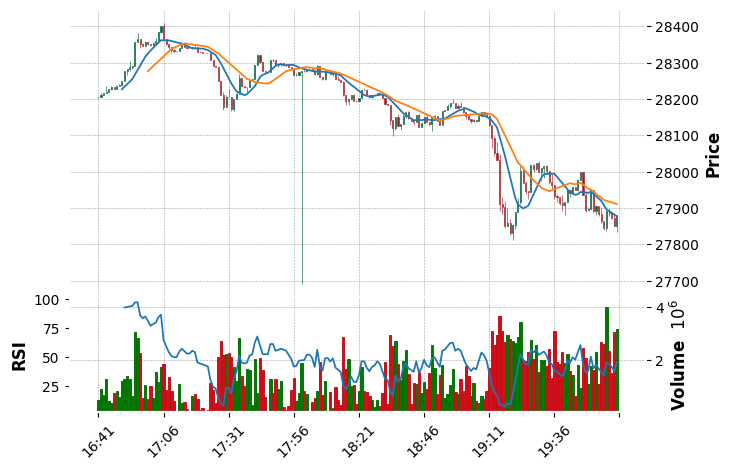

In [8]:
mpf.plot(df,
         addplot = [mpf.make_addplot(df['SMA_10'])
                    , mpf.make_addplot(df['SMA_20'])
                    , mpf.make_addplot(df['RSI'], panel=1, ylabel="RSI")
                    ],
         type = 'candle', 
          style='charles',
         volume = True,
        )